# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



PASO 1 y 2

In [4]:
URL = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(URL)
print(response.status_code)

200


PASO 3

In [5]:
import pandas as pd
import io
html = io.StringIO(response.text)
tables = pd.read_html(html)
print(tables)

[                   Rank                    Song  \
0                     1       "Blinding Lights"   
1                     2          "Shape of You"   
2                     3               "Starboy"   
3                     4     "Someone You Loved"   
4                     5             "As It Was"   
..                  ...                     ...   
96                   97      "Someone Like You"   
97                   98  "Too Good At Goodbyes"   
98                   99          "Stay with Me"   
99                  100                "Havana"   
100  As of 22 June 2025      As of 22 June 2025   

                         Artist(s)  Streams (billions)        Release date  \
0                       The Weeknd               4.892    29 November 2019   
1                       Ed Sheeran               4.416      6 January 2017   
2         The Weeknd and Daft Punk               3.951   21 September 2016   
3                    Lewis Capaldi               3.943     8 November 2018

In [6]:
df = tables[0]
df.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.892,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.416,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.951,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.943,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.931,1 April 2022,[6]


PASO 4

In [24]:
df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Realese date", "Ref"]

df["Song"] = df["Song"].str.replace(r"\[.*?\]", "", regex=True)
df["Artist"] = df["Artist"].str.replace(r"\[.*?\]", "", regex=True)

df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)]

df["Streams (billions)"] = df["Streams (billions)"].astype(float)

df

,Rank,Song,Artist,Streams (billions),Realese date,Ref
0,1,"""Blinding Lights""",The Weeknd,4.892,2019-11-29,[2]
1,2,"""Shape of You""",Ed Sheeran,4.416,2017-01-06,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.951,2016-09-21,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.943,2018-11-08,[5]
4,5,"""As It Was""",Harry Styles,3.931,2022-04-01,[6]
...,...,...,...,...,...,...
95,96,"""Espresso""",Sabrina Carpenter,2.333,2024-04-11,NaN
96,97,"""Someone Like You""",Adele,2.325,2011-01-24,[97]
97,98,"""Too Good At Goodbyes""",Sam Smith,2.324,2017-09-08,[98]
98,99,"""Stay with Me""",Sam Smith,2.314,2014-04-14,[99]


PASO 5

In [43]:
con = sqlite3.connect("top_spotify_songs")

df.to_sql("most_streamed", con, if_exists = "replace", index = False)
cursor = con.cursor()

cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

con.commit()

Rows inserted: 100


PASO 6

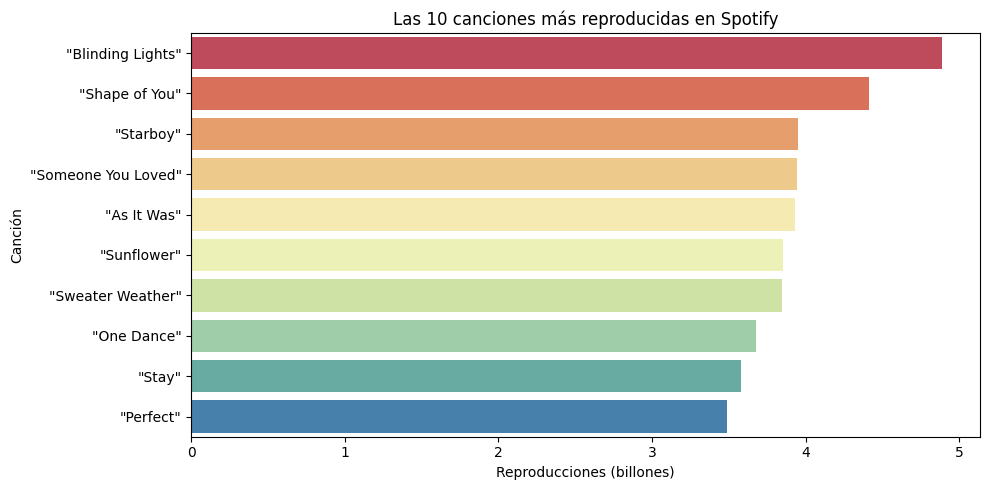

In [49]:
#Las 10 canciones mas reproducidas en Spotify

top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize = (10, 5))
sns.barplot(data = top10, x = "Streams (billions)", y = "Song", hue = "Song", palette = "Spectral", legend = False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (billones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()

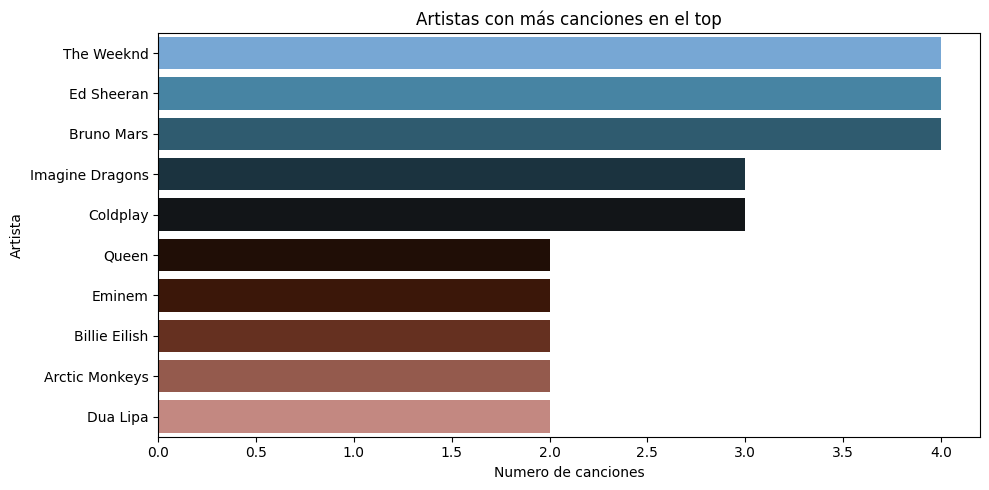

In [53]:
#Artistas con mas canciones en el top

artists = df["Artist"].value_counts().nlargest(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = artists.values, y = artists.index, hue = artists.index, palette = "berlin", legend = False)
plt.title("Artistas con más canciones en el top")
plt.xlabel("Numero de canciones")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()